In [1]:
#Imports

import numpy as np
import pandas as pd
import psychro as psy
import matplotlib.pyplot as plt
from recHeatVapCav import recHeatVapCAV
from recPreHeatVapCav import recPreHeatVapCAV

plt.rcParams["figure.figsize"] = (10, 7.7)
font = {'size': 16}
plt.rc('font', **font)

<font size="6"> **Project HVAC Modeling**</font>

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ZHAW-dm4bem-2023/hvac-2024-GianlucaManfioletti/HEAD)

Names :
        Yvan Meier; 
        Gianluca Manfioletti 
        
Lecturer: Christian Ghiaus 

Date: 18.04.24

# Introduction

In the quest for enhancing indoor comfort and energy efficiency, Heating, Ventilation, and Air Conditioning (HVAC) systems play a pivotal role. These systems are integral to maintaining optimal environmental conditions in residential, commercial, and industrial buildings. With the growing emphasis on sustainable building practices and energy conservation, the need for efficient and effective HVAC system design and operation has never been more critical.

HVAC system modeling is a powerful tool that facilitates the simulation, analysis, and optimization of these systems. By creating digital representations of HVAC components and their interactions, engineers and designers can predict system behavior under various conditions, identify potential issues, and explore innovative solutions. The benefits of HVAC system modeling are multifaceted. It allows for the design of systems that are not only efficient but also cost-effective.

In modeling the HVAC system, mass and energy conservation balance equations are utilized within a direct problem model approach. To ensure comfort and air quality, the model is designed such that the desired room temperature and relative humidity are specified as inputs. Subsequently, the model calculates the sensible and latent heat required to achieve these conditions. A constant air mass flow is employed because controlling temperature with a steady airflow is easier than with variable airflow. Consequently, the system is less efficient but more effective.

# HVAC Setup One

<div style="text-align:center;">
    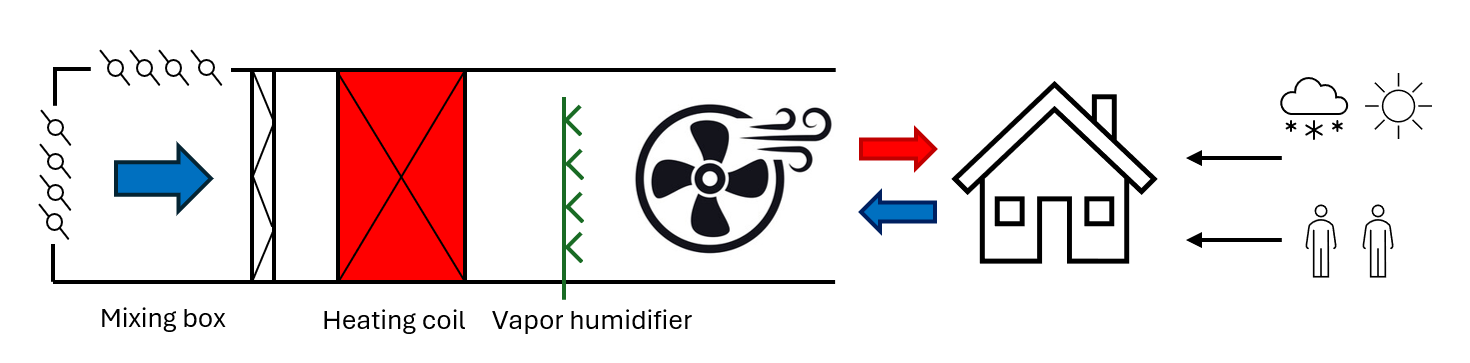
</div>

> Figure 1. Schematic representation of the AHU including the distribution network.

The system features an Air Handling Unit (AHU) equipped with a mixing box designed to recycle a portion of the indoor air. Complementing this feature are a heating coil and a vapor humidifier. Notably, this system is tailored for cold regions, as it lacks cooling components.

The inclusion of a mixing box allows for the reuse of indoor air, promoting energy efficiency by reducing the demand for external air conditioning. Meanwhile, the heating coil ensures that the indoor environment remains comfortably warm, especially crucial in colder climates. Additionally, the vapor humidifier maintains optimal humidity levels, contributing to occupant comfort and well-being.

By forgoing cooling components, the system is optimized for regions where cooling demands are minimal or non-existent, emphasizing efficiency in colder climates.

## Block diagram and legend 

<div style="text-align:center;">
    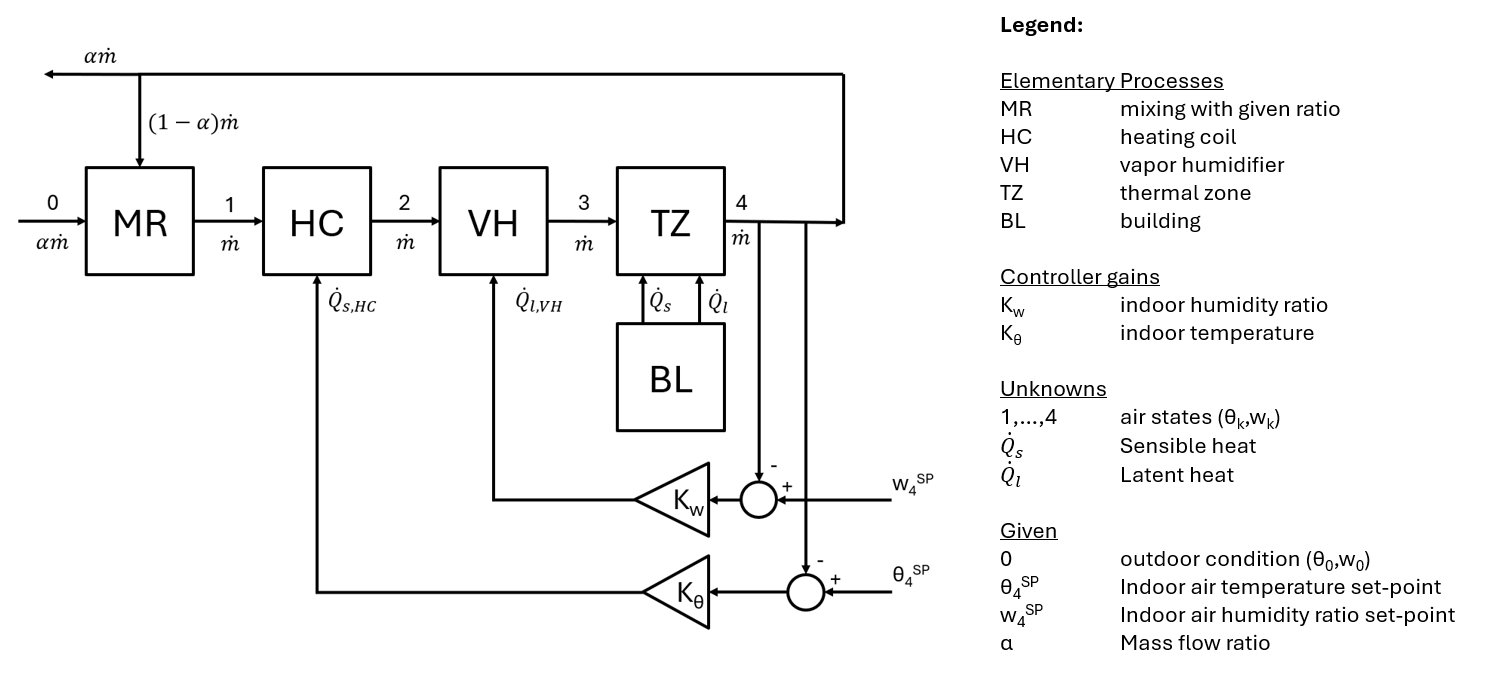
</div>

## Mathematical Model 

<u>Mixing with given ratio<u>

\begin{equation}
\begin{gathered}
\dot{m}c\theta _{1}-(1-\alpha)\dot{m}c\theta _{4}=\alpha\dot{m}c\theta_{0}
\end{gathered}
\end{equation}

\begin{equation}
\begin{gathered}
\dot{m}lw_{1}-(1-\alpha)\dot{m}lw_{4}=\alpha\dot{m}lw_{0}
\end{gathered}
\end{equation}

<u>Heating Coil<u>

\begin{equation}
\begin{gathered}
-\dot{m}c\theta _{1}+\dot{m}c\theta _{2}-\dot{Q}_{s,HC} = 0
\end{gathered}
\end{equation}

\begin{equation}
\begin{gathered}
-\dot{m}lw _{1}+\dot{m}lw _{2} = 0
\end{gathered}
\end{equation}

<u>Vapor Humidification<u>

\begin{equation}
\begin{gathered}
-\dot{m}c\theta _{2}+\dot{m}c\theta _{3} = 0
\end{gathered}
\end{equation}

\begin{equation}
\begin{gathered}
-\dot{m}lw _{2}+\dot{m}lw _{3} -\dot{Q}_{l,VH} = 0
\end{gathered}
\end{equation}

<u>Thermal Zone<u>

\begin{equation}
\begin{gathered}
-\dot{m}c\theta_{3}+\dot{m}c\theta_{4}-\dot{Q}_{s,TZ} = 0
\end{gathered}
\end{equation}

\begin{equation}
\begin{gathered}
-\dot{m}lw _{3}+\dot{m}lw _{4} -\dot{Q}_{l,TZ} = 0
\end{gathered}
\end{equation}

<u>Building<u>

\begin{equation}
\begin{gathered}
(UA+\dot{m}_{a}c)\theta_{4}+\dot{Q}_{s,TZ}=(UA+\dot{m}_{a}c)\theta_{0}+\dot{Q}_{s,a}
\end{gathered}
\end{equation}

\begin{equation}
\begin{gathered}
\dot{m}_{a}lw_{4}+\dot{Q}_{l,TZ}=\dot{m}_{a}lw_{0}+\dot{Q}_{l,a}
\end{gathered}
\end{equation}

<u>Controller<u> 

\begin{equation}
\begin{gathered}
\dot{Q}_{s,HC}+K_{\theta}\theta_{4}=K_{\theta}\theta_{4,SP}
\end{gathered}
\end{equation}

\begin{equation}
\begin{gathered}
\dot{Q}_{l,VH}+K_{w}w_{4}=K_{w}w_{4,SP}
\end{gathered}
\end{equation}

<u>Saturation and Condensation Curve<u>

\begin{equation}
\begin{gathered}
c\theta _{1}+lw_{1}-c\theta_{1}^{*}-lw_{1}^{*}=0
\end{gathered}
\end{equation}

\begin{equation}
\begin{gathered}
w_{s}^{'}(\theta_{0,\infty}^{*})\theta_{1}^{*}-w_{1}^{*}=w_{s}^{'}(\theta_{0,\infty}^{*})\theta_{\infty}^{*}-w_{s}(\theta_{0,\infty}^{*})
\end{gathered}
\end{equation}

<u>Linear matrix<u>

Solving for x
\begin{equation}
\begin{gathered}
Ax = b
\end{gathered}
\end{equation}
with

\begin{equation}
\begin{gathered}
A = \begin{bmatrix}
\dot{m}c&  0&  0&  0&  0&  0&  0&  0&  -(1-\alpha)\dot{m}c&  0&  0&  0&  0& 0\\ 
0&  \dot{m}l&  0&  0&  0&  0&  0&  0&  0&  -(1-\alpha)\dot{m}l&  0&  0&  0& 0\\ 
c&  l&  -c&  -l&  0&  0&  0&  0&  0&  0&  0&  0&  0& 0\\ 
0&  0&  w_{s}^{'}(\theta_{0,\infty})&  -1&  0&  0&  0&  0&  0&  0&  0&  0&  0& 0\\ 
-\dot{m}c&  0&  0&  0&  \dot{m}c&  0&  0&  0&  0&  0&  0&  0&  -1& 0\\ 
0&  -\dot{m}l&  0&  0&  0&  \dot{m}l&  0&  0&  0&  0&  0&  0&  0& 0\\ 
0&  0&  0&  0&  -\dot{m}c&  0&  \dot{m}c&  0&  0&  0&  0&  0&  0& 0\\ 
0&  0&  0&  0&  0&  -\dot{m}l&  0&  \dot{m}l&  0&  0&  0&  0&  0& -1\\ 
0&  0&  0&  0&  0&  0&  -\dot{m}c&  0&  \dot{m}c&  0&  -1&  0&  0& 0\\ 
0&  0&  0&  0&  0&  0&  0&  -\dot{m}l&  0&  \dot{m}l&  0&  -1&  0& 0\\ 
0&  0&  0&  0&  0&  0&  0&  0&  (UA+\dot{m}_{a}c)&  0&  1&  0&  0& 0\\ 
0&  0&  0&  0&  0&  0&  0&  0&  0&  \dot{m}_{a}l&  0&  1&  0& 0\\ 
0&  0&  0&  0&  0&  0&  0&  0&  K_{\theta}&  0&  0&  0&  1& 0\\ 
0&  0&  0&  0&  0&  0&  0&  0&  0&  K_{w}&  0&  0&  0& 1 
\end{bmatrix}
\end{gathered}
\end{equation}

\begin{equation}
\begin{gathered}
x = \begin{bmatrix}
\theta_{1} & w_{1} & \theta_{1}^{*} & w_{1}^{*} & \theta_{2} & w_{2} & \theta_{3} & w_{3} & \theta_{4} & w_{4} & \dot{Q}_{s,TZ} & \dot{Q}_{l,TZ} & \dot{Q}_{s,HC} & \dot{Q}_{l,VH} 
\end{bmatrix}^{T}
\end{gathered}
\end{equation}

\begin{equation}
\begin{gathered}
b=\begin{bmatrix}
\alpha\dot{m}c\theta_{0}&  \alpha\dot{m}l\theta_{0}&  0&  [w_{s}^{'}(\theta_{0,\infty}^{*})\theta_{\infty}^{*}-w_{s}(\theta_{0,\infty}^{*})]&  0&  0&  0&  0&  0&  0&  [(UA+\dot{m}_{a}c)\theta_{0}+\dot{Q}_{s,a}]&  [\dot{m}_{a}lw_{0}+\dot{Q}_{l,a}]&  K_{\theta}\theta_{4,SP}& K_{w}w_{4,SP}
\end{bmatrix}^{T}
\end{gathered}
\end{equation}

## Implementation 

The following tables give an overview of the inputs and parameters and their symbols used in the Python code.

> Table 1. Inputs to modify the operating point and external conditions of the system.

| Symbol (formulas) |Symbol (code)| Unit | Meaning                               |
|-------------------|-------------|------|---------------------------------------|  
|$\theta_I^{sp}$    |`θIsp`       | °C   |Set-point for indoor air temperature   |
|$\varphi_I^{sp}$   |`φIsp`       | -    |Set-point for indoor relative humidity |
|$\theta_O$         |`θO`         | °C   |Outdoor air temperature                |
|$\varphi_O$        |`φO`         | -    |Outdoor air relative humidity          |

> Table 2. Parameters to modify the operation of the HVAC system.

| Symbol (formulas) |Symbol (code)| Unit | Meaning                               |
|-------------------|-------------|------|---------------------------------------| 
|$\alpha$           | `α`         | -    |Mass ratio of mixing |
|$\dot{m}$          | `m`         | kg/s  |Outdoor air temperature                |

> Table 3. Parameters to modify the characteritics of the building.

| Symbol (formulas) |Symbol (code)| Unit | Meaning                               |
|-------------------|-------------|------|---------------------------------------| 
|$\dot{Q}_{s,a}$    | `Qsa`       | W    |Auxiliary sensible heat of the thermal zone|
|$\dot{Q}_{l,a}$    | `Qla`       | W    |Auxiliary latent heat of the thermal zone|
|$\dot{m}_i$        | `mi`        | kg/s |Mass flow rate of air infiltration into the thermal zone|
|$U A$              | `UA`        | W/°C |Overall thermal conductance of the thermal zone|

In the code, the inputs and parameters are first defined and passed to a function which solves the system of linear set of equations shown above. The solution is then used to an if condition to detect wether the mixing point is in the oversaturated regime, thus if $w_2>w_{s}$ at the temperature $\theta_2$. when this is the case, the saturation point $(\theta_3 , w_3)$ must be found along the isenthalpe. This is done iteratively using the Newton algorithm. For this procedure, the system of equations is extended by the two equations:

$$c\theta_{3,n+1}+lw_{3,n+1}-c\theta_2-lw_2=0$$

$$\theta_{3,n+1}=\theta_{3,n}-\frac{w_s(\theta)|_{\theta = \theta_{3,n}}-w_{3,n+1}}{w_s^\prime(\theta)|_{\theta = \theta_{3,n}}}$$

The first equation contains the condition that the total energy remains constant, ensuring that the new point $(\theta_{3,n+1},w_{3,n+1})$ will be on the same isenthalpic line as point 2. The second equation describes the Newton algorithm, where:
- $w_s(\theta)|_{\theta = \theta_{3,n}}$ is the calculated humidity ratio of the temperature $\theta_3$ from the last iteration $n$;
- $w_s^\prime(\theta)|_{\theta = \theta_{3,n}}$ is the derivative of the saturation curve at the location of the temperature $\theta_3$ from the last iteration $n$.

The numerator $(w_s(\theta)|_{\theta = \theta_{3,n}}-w_{3,n+1})$ of the fraction converges to zero as the number of iterations increases. The centre of the interval $\left[\theta_O \; \theta_I^{sp}\right]$   is chosen as the initial value $\theta_{3,0}$:
$$\theta_{3,0}=(\theta_0-\theta_I^{sp})/2$$

The extended system of equations described above is solved until the error is sufficiently small. This is done in a while loop with the cancellation criterion $|\theta_{3,n}-\theta_{3_n+1}|<0.01$.

<b>Inputs:<u>

In [2]:
θ0 = 0      #outer temperature (°C )
φ0 = 0.5    #outer humidity (-)
θIsp = 35   #Inner set-point temperature (°C )
φIsp = 0.8  #Inner set-point humidity (-)

<b>Parameters:<b>

In [3]:
UA = 85     #(total heat transfer coefficient)*(surface area) (W/K)
α = 0.4     #mass ratio of mixing (-)
m = 1       #mass flow rate (kg/s)
Qsa = 2100  #sensible auxiliary load (W)
Qla = 5000  #latent auxiliary load (W)
ma = 0.2    #infiltration mass flow rate (kg/s)

## Results

Show Psychrometric diagram, show Output, compare with Set-points 

<b>Psychrometric diagram<b>

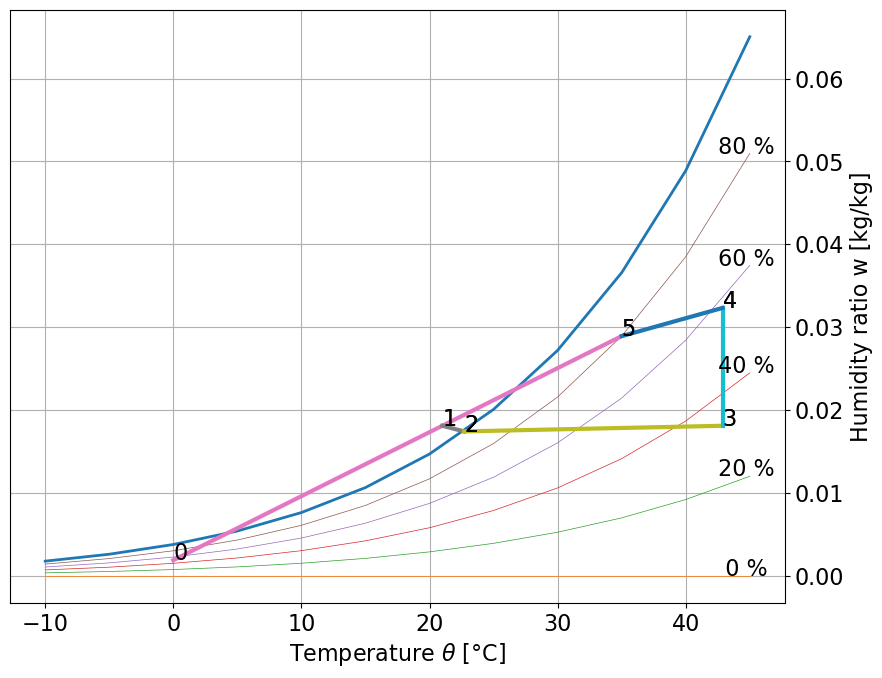

In [4]:

x= recHeatVapCAV(θ0, φ0, θIsp, φIsp, UA, α, m, Qsa, Qla, ma) #function for adiabatic mixing and plotting

<b>Outputs:<b>

In [5]:

if len(x)>12: #assignment for adiabatic mixing (from oversaturated regime)
    [θ1, w1, θ2, w2, θ3, w3, θ4, w4, θ5, w5, QsTZ, QlTZ, QsHC, QsVH] = x
    [φ1, φ2, φ3, φ4, φ5] = [psy.phi(θ1, w1), psy.phi(θ2, w2), psy.phi(θ3, w3), psy.phi(θ4, w4), psy.phi(θ5, w5)]
    
    # Definition of vector y
    y = {
        'Output': ['θ1', 'w1', 'θ2', 'w2', 'θ3', 'w3', 'θ4', 'w4', 'θ5', 'w5', 'Qs,TZ', 'Ql,TZ', 'Qs,HC', 'Ql,V','Q_tot','φ1', 'φ2', 'φ3', 'φ4', 'φ5'],
        'Value': [x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7], x[8], x[9], x[10]/1000, x[11]/1000, x[12]/1000, x[13]/1000, (x[12]+x[13])/1000, psy.phi(θ1, w1), psy.phi(θ2, w2), psy.phi(θ3, w3), psy.phi(θ4, w4), psy.phi(θ5, w5)],
        'Unit': ['°C', 'g/kg', '°C', 'g/kg', '°C', 'g/kg', '°C', 'g/kg', '°C', 'g/kg', 'kW', 'kW', 'kW', 'kW', 'kW','%','%','%','%', '%']
        }
    # Create DataFrame
    df1 = pd.DataFrame(y).round(3)
    selected_df1 = df1.loc[[8, 9, 19, 12, 13,14]]
    
else:  #assignment for normal mixing
    [θ1, w1, θ2, w2, θ3, w3, θ4, w4, QsTZ, QlTZ, QsHC, QsVH] = x
    [φ1, φ2, φ3, φ4] = [psy.phi(θ1, w1), psy.phi(θ2, w2), psy.phi(θ3, w3), psy.phi(θ4, w4)]
    
    # Definition of vector y
    y = {
        'Output': ['θ1', 'w1', 'θ2', 'w2', 'θ3', 'w3', 'θ4', 'w4', 'Qs,TZ', 'Ql,TZ', 'Qs,HC', 'Ql,V','Q_tot','φ1', 'φ2', 'φ3', 'φ4'],
        'Value': [x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7], x[8]/1000, x[9]/1000, x[10]/1000, x[11]/1000, (x[10]+x[11])/1000, psy.phi(θ1, w1), psy.phi(θ2, w2), psy.phi(θ3, w3), psy.phi(θ4, w4)],
        'Unit': ['°C', 'g/kg', '°C', 'g/kg', '°C', 'g/kg', '°C', 'g/kg', 'kW', 'kW', 'kW', 'kW', 'kW','%','%','%','%']
        }

    # Create DataFrame
    df1 = pd.DataFrame(y).round(3)
    selected_df1 = df1.loc[[6, 7, 16, 10, 11,12]]  
    
# Output of DataFrame as Table 
selected_df1

,Output,Value,Unit
8,θ5,34.998,°C
9,w5,0.029,g/kg
19,φ5,0.800,%
12,"Qs,HC",21.874,kW
13,"Ql,V",35.490,kW
14,Q_tot,57.364,kW


# HVAC Setup Two (Pre Heating)

<div style="text-align:center;">
    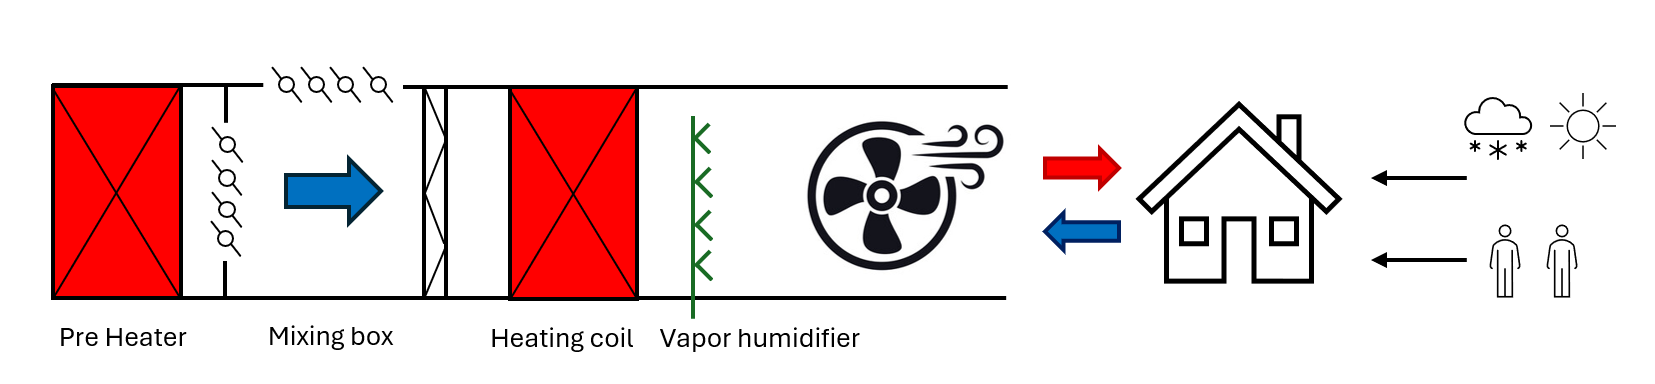
</div>

> Figure 2. Schematic representation of the AHU with an additionl pre heater before the mixing box.

Condensation in the Air Handling Unit (AHU) should be avoided for several critical reasons. It creates a damp environment that promotes mold and mildew growth, leading to health issues such as respiratory problems and allergies. Moreover, condensation can mix with dust and other contaminants in the AHU, creating a breeding ground for bacteria and other pathogens, which degrades indoor air quality and poses health risks to occupants. Stagnant water and microbial growth can also produce unpleasant odors, negatively affecting the indoor environment.

Furthermore, condensation can cause corrosion of metal parts within the AHU, including coils, ducts, and other components. This corrosion reduces the lifespan of the equipment, increases maintenance costs, and can lead to system failures. Moisture can also infiltrate electrical components, causing short circuits or other electrical issues that disrupt system operation and pose safety hazards.

To prevent condensation, a pre-heater was installed before the mixing box to ensure that the outside air entering the AHU has a higher temperature. This approach helps mitigate condensation when the outside air mixes with the recycled indoor air. By pre-heating the outside air, its temperature is raised to a level that reduces the likelihood of condensation forming as it blends with the warmer recycled air.

## Block diagram and legend 

<div style="text-align:center;">
    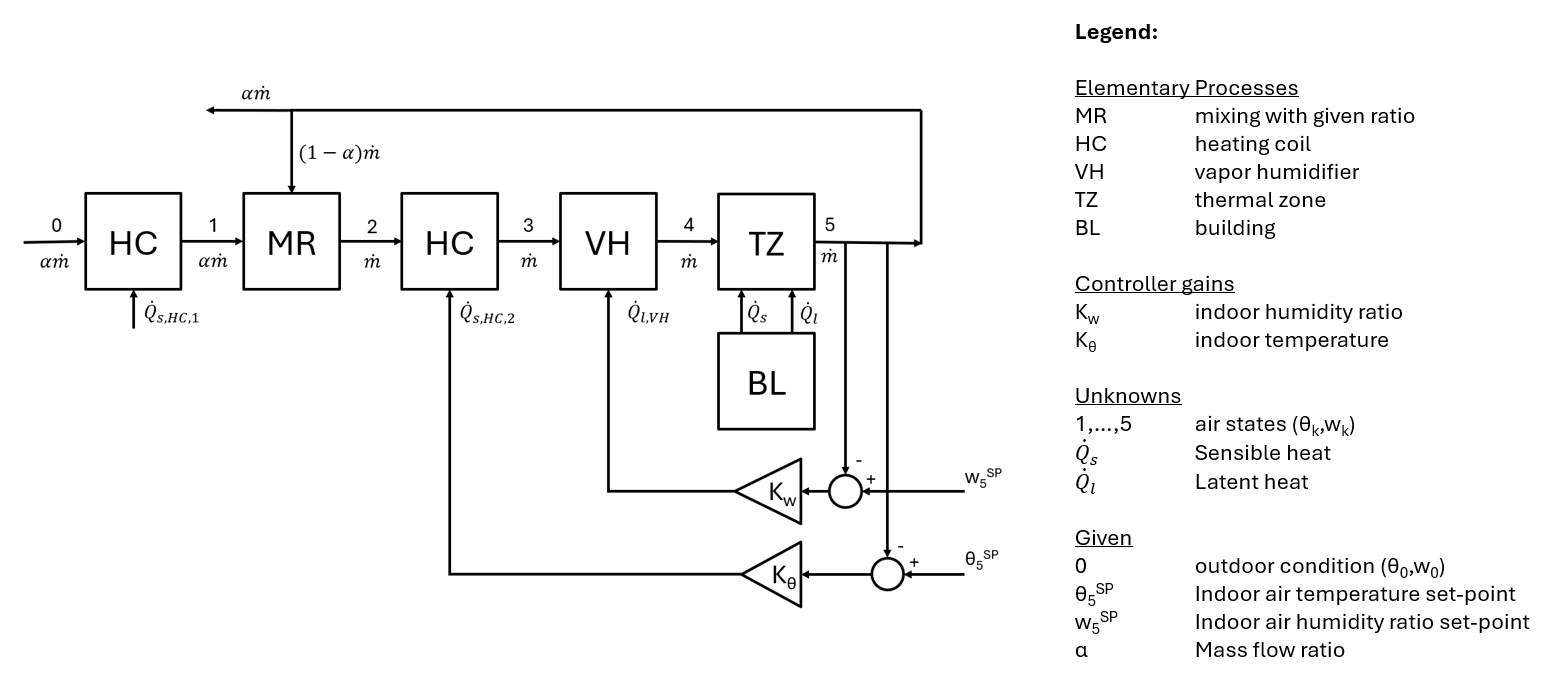
</div>

## Mathematical modelling 

<u>Pre Heating / Heating Coil 1<u>

\begin{equation}
\begin{gathered}
\dot{m}c\theta_{1}=\dot{m}c\theta _{0}+\dot{Q}_{s,HC1}
\end{gathered}
\end{equation}

\begin{equation}
\begin{gathered}
\dot{m}lw _{1}=\dot{m}lw _{0} 
\end{gathered}
\end{equation}

<u>Mixing with given ratio<u>

\begin{equation}
\begin{gathered}
-\alpha\dot{m}c\theta_{1}+\dot{m}c\theta _{2}-(1-\alpha)\dot{m}c\theta _{5}=0
\end{gathered}
\end{equation}

\begin{equation}
\begin{gathered}
-\alpha\dot{m}lw{1}+\dot{m}lw_{2}-(1-\alpha)\dot{m}lw_{5}=0
\end{gathered}
\end{equation}

<u>Heating Coil 2<u>

\begin{equation}
\begin{gathered}
-\dot{m}c\theta _{2}+\dot{m}c\theta_{3}-\dot{Q}_{s,HC2} = 0
\end{gathered}
\end{equation}

\begin{equation}
\begin{gathered}
-\dot{m}lw_{2}+\dot{m}lw_{3} = 0
\end{gathered}
\end{equation}

<u>Vapor Humidification<u>

\begin{equation}
\begin{gathered}
-\dot{m}c\theta_{3}+\dot{m}c\theta_{4} = 0
\end{gathered}
\end{equation}

\begin{equation}
\begin{gathered}
-\dot{m}lw_{3}+\dot{m}lw_{4} -\dot{Q}_{l,VH} = 0
\end{gathered}
\end{equation}

<u>Thermal Zone<u>

\begin{equation}
\begin{gathered}
-\dot{m}c\theta_{4}+\dot{m}c\theta_{5}-\dot{Q}_{s,TZ} = 0
\end{gathered}
\end{equation}

\begin{equation}
\begin{gathered}
-\dot{m}lw_{4}+\dot{m}lw_{5} -\dot{Q}_{l,TZ} = 0
\end{gathered}
\end{equation}

<u>Building<u>

\begin{equation}
\begin{gathered}
(UA+\dot{m}_{a}c)\theta_{5}+\dot{Q}_{s,TZ}=(UA+\dot{m}_{a}c)\theta_{0}+\dot{Q}_{s,a}
\end{gathered}
\end{equation}

\begin{equation}
\begin{gathered}
\dot{m}_{a}lw_{5}+\dot{Q}_{l,TZ}=\dot{m}_{a}lw_{0}+\dot{Q}_{l,a}
\end{gathered}
\end{equation}

<u>Controller<u> 

\begin{equation}
\begin{gathered}
\dot{Q}_{s,HC2}+K_{\theta}\theta_{5}=K_{\theta}\theta_{5,SP}
\end{gathered}
\end{equation}

\begin{equation}
\begin{gathered}
\dot{Q}_{l,VH}+K_{w}w_{5}=K_{w}w_{5,SP}
\end{gathered}
\end{equation}

<u>Linear matrix<u>

Solving for x
\begin{equation}
\begin{gathered}
Ax = b
\end{gathered}
\end{equation}
with

\begin{equation}
\begin{gathered}
A=\begin{bmatrix}
\dot{m}c&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0& 0\\
0&  \dot{m}l&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0& 0\\  
-\alpha\dot{m}c&  0&  \dot{m}c&  0&  0&  0&  0&  0&  -(1-\alpha)\dot{m}c&  0&  0&  0&  0& 0\\ 
0&  -\alpha\dot{m}l&  0&  \dot{m}l&  0&  0&  0&  0&  0&  -(1-\alpha)\dot{m}l&  0&  0&  0& 0\\ 
0&  0&  -\dot{m}c&  0&  \dot{m}c&  0&  0&  0&  0&  0&  0&  0&  -1& 0\\ 
0&  0&  0& -\dot{m}l&  \dot{m}l&  0&  0&  0&  0&  0&  0&  0&  0& 0\\ 
0&  0&  0&  0&  -\dot{m}c&  0&  \dot{m}c&  0&  0&  0&  0&  0&  0& 0\\ 
0&  0&  0&  0&  0&  -\dot{m}l&  0&  \dot{m}l&  0&  0&  0&  0&  0& -1\\ 
0&  0&  0&  0&  0&  0&  -\dot{m}c&  0&  \dot{m}c&  0&  -1&  0&  0& 0\\ 
0&  0&  0&  0&  0&  0&  0&  -\dot{m}l&  0&  \dot{m}l&  0&  -1&  0& 0\\ 
0&  0&  0&  0&  0&  0&  0&  0&  (UA+\dot{m}_{a}c)&  0&  1&  0&  0& 0\\ 
0&  0&  0&  0&  0&  0&  0&  0&  0&   \dot{m}_{a}l&  0&  1&  0& 0\\ 
0&  0&  0&  0&  0&  0&  0&  0&  K_{\theta}&  0&  0&  0&  1& 0\\ 
0&  0&  0&  0&  0&  0&  0&  0&  0&  K_{w}&  0&  0&  0& 1 
\end{bmatrix}
\end{gathered}
\end{equation}

\begin{equation}
\begin{gathered}
x=\begin{bmatrix}
\theta_{1}&  w_{1}&  \theta_{2}&  w_{2}&  \theta_{3}&  w_{3}&  \theta_{4}&  w_{4}&  \theta_{5}&  w_{5}&  \dot{Q}_{s,TZ} & \dot{Q}_{l,TZ} & \dot{Q}_{s,HC2} & \dot{Q}_{l,VH}  
\end{bmatrix}^{T}
\end{gathered}
\end{equation}

\begin{equation}
\begin{gathered}
b=\begin{bmatrix}
[\dot{m}c\theta_{0}+\dot{Q}_{s,HC1}]&  \dot{m}lw_{0}&  0&  0&  0&  0&  0&  0&  0&  0&   [(UA+\dot{m}_{a}c)\theta_{0}+\dot{Q}_{s,a}]&  [\dot{m}_{a}lw_{0}+\dot{Q}_{l,a}]&  K_{\theta}\theta_{5,SP}& K_{w}w_{5,SP} 
\end{bmatrix}^{T}
\end{gathered}
\end{equation}

## Implementation

> Table 4. Inputs to modify the operating point and external conditions of the system.

| Symbol (formulas) |Symbol (code)| Unit | Meaning                               |
|-------------------|-------------|------|---------------------------------------|  
|$\theta_I^{sp}$    |`θIsp`       | °C   |Set-point for indoor air temperature   |
|$\varphi_I^{sp}$   |`φIsp`       | -    |Set-point for indoor relative humidity |
|$\theta_O$         |`θO`         | °C   |Outdoor air temperature                |
|$\varphi_O$        |`φO`         | -    |Outdoor air relative humidity          |

> Table 5. Parameters to modify the operation of the HVAC system.

| Symbol (formulas) |Symbol (code)| Unit | Meaning                               |
|-------------------|-------------|------|---------------------------------------| 
|$\alpha$           | `α`         | -    |mass ratio of mixing                   |
|$\dot{m}$          | `m`         | kg/s |Outdoor air temperature               |

> Table 6. Parameters to modify the characteritics of the building.

| Symbol (formulas) |Symbol (code)| Unit | Meaning                               |
|-------------------|-------------|------|---------------------------------------| 
|$\dot{Q}_{s,a}$    | `Qsa`       | W    |Auxiliary sensible heat of the thermal zone|
|$\dot{Q}_{l,a}$    | `Qla`       | W    |Auxiliary latent heat of the thermal zone|
|$\dot{m}_i$        | `mi`        | kg/s |Mass flow rate of air infiltration into the thermal zone|
|$U A$              | `UA`        | W/°C |Overall thermal conductance of the thermal zone|

The case where preheating is required occurs when the mixing point is in the supersaturated region.To find this out, the above system of equations is first solved and then the condition 'if $w_2(\theta_2)\geq w_s(\theta_2)$' is used to detect the case where preheating is required. If this is the case, the point $(\theta_2,w_2)$ is successively shifted by $\Delta \theta = 1^{\circ}C$ in a while loop until the mixing point is in the undersaturated regime. When such a point is found, a safety of $\theta_{safety}=3^{\circ}C$ is added. Figure 3 shows a sketch of this process in the psychrometric diagram. The length of the yellow line in the sketch would equal the needed temperature difference $\Delta \theta_{preHeat}$ when pre-heating. The sensible heat would then be $\dot{Q}_{s, preHeat}=mc \ \Delta \theta_{preHeat}$.

<div style="text-align:center;">
    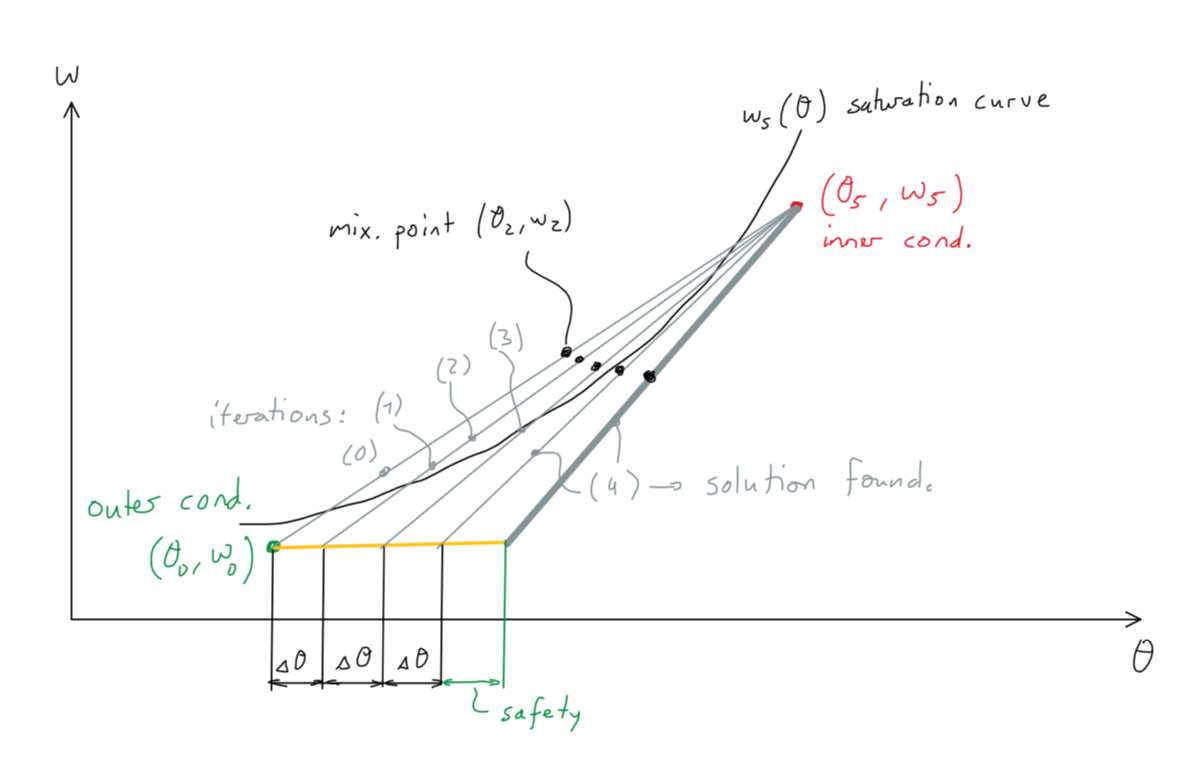
</div>

> Figure 3. Sketch of the iterative process to find the output temperature of the preheater.

<b>Inputs:<b>

In [6]:
θ0 = 0      #outer temperature (°C )
φ0 = 0.5    #outer relative humidity (-)
θIsp = 35   #Inner set-point temperature (°C )
φIsp = 0.8  #Inner set-point realtive humidity (-)

<b>Parameters:<b>

In [7]:
UA = 85     #(total heat transfer coefficient)*(surface area) (W/K)
α = 0.4     #mass ratio of mixing (-)
m = 1       #mass flow rate (kg/s)
Qsa = 2100  #sensible auxiliary load (W)
Qla = 5000  #latent auxiliary load (W)
ma = 0.2    #infiltration mass flow rate (kg/s)

## Results 

<b>Psychrometric Diagram<b>

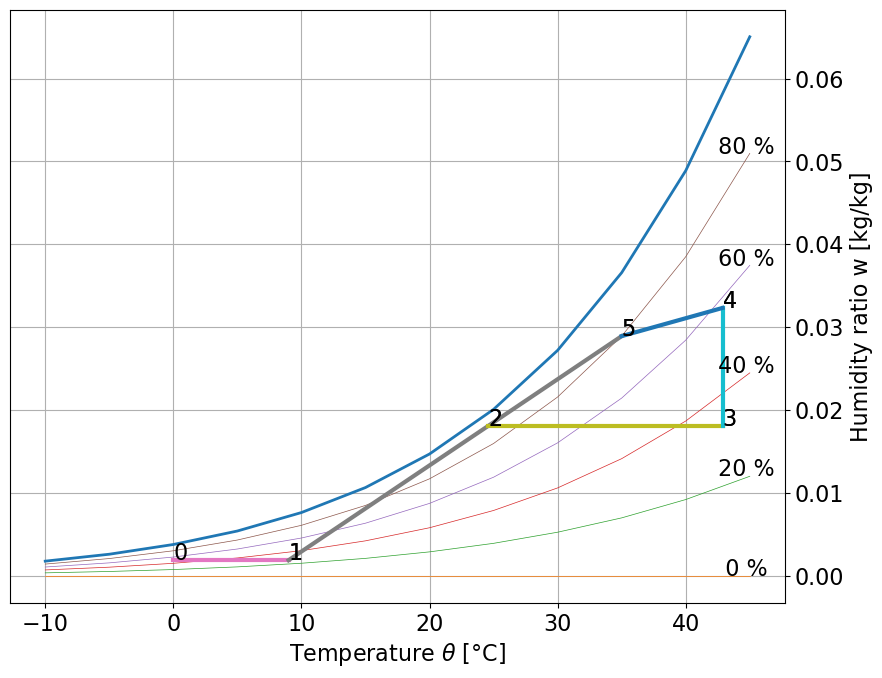

In [8]:

x, QsHC1 = recPreHeatVapCAV(θ0, φ0, θIsp, φIsp, UA, α, m, Qsa, Qla, ma) #funtion for preheat, mix, heat, humid., plotting

<b>Outputs:<b>

In [9]:

[θ1, w1, θ2, w2, θ3, w3, θ4, w4, θ5, w5, QsTZ, QlTZ, QsHC, QsVH] = x #assignment of outputs
[φ1, φ2, φ3, φ4] = [psy.phi(θ1, w1), psy.phi(θ2, w2), psy.phi(θ4, w4), psy.phi(θ5, w5)] #conversion from vapor mass ratio to rel. humidity

# Definition des Vektors y
y = {
    'Output': ['θ1', 'w1', 'θ2', 'w2', 'θ3', 'w3', 'θ4', 'w4', 'θ5', 'w5', 'Qs,TZ', 'Ql,TZ', 'Qs,HC2', 'Ql,V', 'Qs,HC1','Q_tot', 'φ1', 'φ2', 'φ3', 'φ5'],
    'Value': [x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7], x[8], x[9], x[10]/1000, x[11]/1000, x[12]/1000, x[13]/1000, QsHC1/1000, (x[12]+x[13]+QsHC1)/1000, psy.phi(θ1, w1), psy.phi(θ2, w2), psy.phi(θ4, w4), psy.phi(θ5, w5)],
    'Unit': ['°C', 'g/kg', '°C', 'g/kg', '°C', 'g/kg', '°C', 'g/kg', '°C', 'g/kg', 'kW', 'kW', 'kW', 'kW', 'kW', 'kW','%','%','%','%']
    }
# Erstellen des DataFrame
df2 = pd.DataFrame(y).round(3)
selected_df2 = df2.loc[[8, 9, 19, 12, 13, 14,15]]


# Ausgabe des DataFrames als Tabelle
selected_df2

,Output,Value,Unit
8,θ5,34.998,°C
9,w5,0.029,g/kg
19,φ5,0.800,%
12,"Qs,HC2",18.274,kW
13,"Ql,V",35.490,kW
14,"Qs,HC1",9.000,kW
15,Q_tot,62.764,kW


# Conclusion 

The HVAC system, featuring a pre-heater, mixing box, heating coil, and vapor humidifier, is meticulously designed to ensure optimal comfort and air quality in cold regions. The inclusion of a pre-heater effectively prevents condensation when mixing outside air with recirculated indoor air. However, this design choice requires additional energy.

Specifically, pre-heating is often unnecessary because outside temperatures are not frequently low enough to cause oversaturation when mixing with indoor air. Consequently, in many climates, the need for pre-heating is minimal. Despite this, the model prioritizes constant air mass flow to facilitate easier temperature control, ensuring a consistently comfortable and healthy indoor environment.

This approach demonstrates the importance of thoughtful design in HVAC systems, particularly in colder climates where preventing condensation and maintaining air quality are paramount. By carefully balancing energy use with the need for effective climate control, the system aims to deliver both comfort and sustainability.